In [115]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Specify relative path to the file
file_path = "../database/CreditCard_CLEANED.csv"

# Load data into a pandas DataFrame
df = pd.read_csv(file_path)


In [116]:
data=df.copy()

# PEGAREMOS APENAS AS COLUNAS RELACIONADAS DIRETAMENTE AOS SERVIÇOS DO PLANO E VEREMOS SE É POSSÍVEL PREVER O VALOR 

In [117]:
data = data[['Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method', 'Monthly Charges']]


In [118]:
data

,Partner,Dependents,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges
0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85
1,No,Yes,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70
2,No,Yes,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65
3,Yes,Yes,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80
4,No,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,No,No,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15
7039,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80
7040,Yes,Yes,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20
7041,Yes,Yes,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60


In [119]:
# Splitting the dataset into train and test sets
train_data = data.iloc[:6500]
test_data = data.iloc[6500:]

# Separating input features (X) and target variable (y) for train dataset
X_train = train_data.drop(columns=['Monthly Charges'])
y_train = train_data['Monthly Charges']


categorical_features = ['Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Internet Service', 'Online Security', 'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV', 'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Creating the regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Fitting the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Partner', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Internet Service',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Device Protection',
                                                   'Tech Support',
                                                   'Streaming TV',
                                                   'Streaming Movies',
                                                   'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method'])])),
                ('regressor', LinearRegression())])

In [120]:
def predict_monthly_charge(customer_data):
    # Ensure the input data has the same columns as the training data, excluding 'Monthly Charges'
    input_columns = X_train.columns
    input_data = customer_data[input_columns]

    # Reshape the input data into a DataFrame with a single row (required format for the pipeline)
    input_data = input_data.to_frame().T

    # Make the prediction using the trained pipeline
    predicted_monthly_charge = pipeline.predict(input_data)

    return predicted_monthly_charge[0]

# Example usage of the predict_monthly_charge function
sample_customer = test_data.iloc[0]
print("Predicted Monthly Charge:", predict_monthly_charge(sample_customer))

Predicted Monthly Charge: 19.943359375


In [121]:
import random

# Select 5 random customers from the test dataset
random_indices = random.sample(range(len(test_data)), 20)
random_customers = test_data.iloc[random_indices]

In [122]:
predicted_ALL_regression = []
# Print the actual and predicted monthly charges for the selected customers
for i, customer in random_customers.iterrows():
    actual_monthly_charge = customer["Monthly Charges"]
    predicted_monthly_charge = predict_monthly_charge(customer)

    print(f"Customer {i}:")
    print(f"  Actual Monthly Charge: {actual_monthly_charge:.2f}")
    print(f"  Predicted Monthly Charge: {predicted_monthly_charge:.2f}\n")
    predicted_ALL_regression.append(predicted_monthly_charge)


Customer 6603:
  Actual Monthly Charge: 61.00
  Predicted Monthly Charge: 60.02

Customer 6941:
  Actual Monthly Charge: 68.45
  Predicted Monthly Charge: 70.05

Customer 6744:
  Actual Monthly Charge: 53.65
  Predicted Monthly Charge: 54.99

Customer 6631:
  Actual Monthly Charge: 75.05
  Predicted Monthly Charge: 75.03

Customer 6781:
  Actual Monthly Charge: 37.70
  Predicted Monthly Charge: 39.89

Customer 6911:
  Actual Monthly Charge: 67.70
  Predicted Monthly Charge: 70.06

Customer 7022:
  Actual Monthly Charge: 49.95
  Predicted Monthly Charge: 50.02

Customer 6832:
  Actual Monthly Charge: 24.00
  Predicted Monthly Charge: 24.99

Customer 6522:
  Actual Monthly Charge: 43.60
  Predicted Monthly Charge: 44.84

Customer 6894:
  Actual Monthly Charge: 20.90
  Predicted Monthly Charge: 19.94

Customer 7020:
  Actual Monthly Charge: 89.20
  Predicted Monthly Charge: 90.03

Customer 6691:
  Actual Monthly Charge: 73.80
  Predicted Monthly Charge: 74.98

Customer 6872:
  Actual Mont

In [123]:
print(predicted_ALL_regression)

[60.015625, 70.0458984375, 54.9873046875, 75.029296875, 39.888671875, 70.0595703125, 50.0234375, 24.9912109375, 44.8447265625, 19.94140625, 90.033203125, 74.9755859375, 110.0498046875, 25.0458984375, 89.84375, 89.97265625, 110.0029296875, 90.11328125, 19.9501953125, 44.8349609375]


In [124]:
from sklearn.ensemble import RandomForestRegressor

# Create the regression pipeline with RandomForestRegressor
pipeline_rf = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=0))])

# Fit the model
pipeline_rf.fit(X_train, y_train)

# Extract the regressor from the pipeline
rf_regressor = pipeline_rf.named_steps['regressor']

# Get the feature importances
importances = rf_regressor.feature_importances_

# Get the preprocessed feature names
transformed_feature_names = preprocessor.get_feature_names_out(categorical_features)

# Map feature importances back to original feature names
feature_importances = dict(zip(transformed_feature_names, importances))

# Print sorted feature importances
for feature, importance in sorted(feature_importances.items(), key=lambda x: x[1], reverse=True):
    print(f"Feature: {feature}, Importance: {importance}")


Feature: cat__Internet Service_Fiber optic, Importance: 0.6210654092089811
Feature: cat__Internet Service_DSL, Importance: 0.06013436476763204
Feature: cat__Streaming Movies_No, Importance: 0.03455742681703299
Feature: cat__Device Protection_No internet service, Importance: 0.03402534133983573
Feature: cat__Streaming TV_No, Importance: 0.027851407013011274
Feature: cat__Phone Service_Yes, Importance: 0.023105172941414558
Feature: cat__Streaming Movies_Yes, Importance: 0.02243835920986171
Feature: cat__Tech Support_No internet service, Importance: 0.021729842919457256
Feature: cat__Online Backup_No internet service, Importance: 0.019919060016234218
Feature: cat__Streaming TV_No internet service, Importance: 0.019829978972533382
Feature: cat__Streaming TV_Yes, Importance: 0.01931120011939819
Feature: cat__Online Security_No internet service, Importance: 0.01794405809277765
Feature: cat__Streaming Movies_No internet service, Importance: 0.015818487904320666
Feature: cat__Internet Service_

In [125]:
X_test = test_data.drop(columns=['Monthly Charges'])
y_test = test_data['Monthly Charges']
y_pred = pipeline.predict(X_test)


In [126]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 1.0188713455902718


In [127]:
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error: {rmse}")


Root Mean Squared Error: 1.0093915719829802


In [128]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")


Mean Absolute Error: 0.7954355145027626


In [129]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")


R-squared: 0.9989180135542205


# Será que conseguimos fazer uma regressão razoavelmente boa pegando apenas as variáveis mais importantes de acordo com o RandomForestRegressor? 

In [130]:
data=df.copy()

In [131]:
data = df[['Internet Service', 'Streaming Movies', 'Device Protection', 'Streaming TV', 'Monthly Charges']]


In [132]:
# Splitting the dataset into train and test sets
train_data = data.iloc[:6500]
test_data = data.iloc[6500:]

# Separating input features (X) and target variable (y) for train dataset
X_train = train_data.drop(columns=['Monthly Charges'])
y_train = train_data['Monthly Charges']


categorical_features = ['Internet Service', 'Streaming Movies', 'Device Protection', 'Streaming TV']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Creating the regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Fitting the model
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Internet Service',
                                                   'Streaming Movies',
                                                   'Device Protection',
                                                   'Streaming TV'])])),
                ('regressor', LinearRegression())])

In [133]:
predicted_IMPORTANT_regression = []
# Print the actual and predicted monthly charges for the selected customers
for i, customer in random_customers.iterrows():
    actual_monthly_charge = customer["Monthly Charges"]
    predicted_monthly_charge = predict_monthly_charge(customer)

    print(f"Customer {i}:")
    print(f"  Actual Monthly Charge: {actual_monthly_charge:.2f}")
    print(f"  Predicted Monthly Charge: {predicted_monthly_charge:.2f}\n")
    predicted_IMPORTANT_regression.append(predicted_monthly_charge)

Customer 6603:
  Actual Monthly Charge: 61.00
  Predicted Monthly Charge: 54.17

Customer 6941:
  Actual Monthly Charge: 68.45
  Predicted Monthly Charge: 54.17

Customer 6744:
  Actual Monthly Charge: 53.65
  Predicted Monthly Charge: 45.30

Customer 6631:
  Actual Monthly Charge: 75.05
  Predicted Monthly Charge: 75.33

Customer 6781:
  Actual Monthly Charge: 37.70
  Predicted Monthly Charge: 45.30

Customer 6911:
  Actual Monthly Charge: 67.70
  Predicted Monthly Charge: 56.50

Customer 7022:
  Actual Monthly Charge: 49.95
  Predicted Monthly Charge: 45.30

Customer 6832:
  Actual Monthly Charge: 24.00
  Predicted Monthly Charge: 21.05

Customer 6522:
  Actual Monthly Charge: 43.60
  Predicted Monthly Charge: 65.37

Customer 6894:
  Actual Monthly Charge: 20.90
  Predicted Monthly Charge: 21.05

Customer 7020:
  Actual Monthly Charge: 89.20
  Predicted Monthly Charge: 85.98

Customer 6691:
  Actual Monthly Charge: 73.80
  Predicted Monthly Charge: 84.19

Customer 6872:
  Actual Mont

In [134]:
X_test = test_data.drop(columns=['Monthly Charges'])
y_test = test_data['Monthly Charges']
y_pred = pipeline.predict(X_test)
# Calcular o Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {mse}")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Root Mean Squared Error: 74.01028117904785
Mean Absolute Error: 6.254116939312845
R-squared: 0.9214050709830653


#ok

In [135]:
data=df.copy()
data = df[['Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method','Monthly Charges']]


In [136]:
# Splitting the dataset into train and test sets
train_data = data.iloc[:6500]
test_data = data.iloc[6500:]

# Separating input features (X) and target variable (y) for train dataset
X_train = train_data.drop(columns=['Monthly Charges'])
y_train = train_data['Monthly Charges']


categorical_features = ['Partner', 'Dependents', 'Phone Service', 'Multiple Lines', 'Online Security', 'Online Backup', 'Tech Support', 'Contract', 'Paperless Billing', 'Payment Method']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)])

# Creating the regression pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', LinearRegression())])

# Fitting the model
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Partner', 'Dependents',
                                                   'Phone Service',
                                                   'Multiple Lines',
                                                   'Online Security',
                                                   'Online Backup',
                                                   'Tech Support', 'Contract',
                                                   'Paperless Billing',
                                                   'Payment Method'])])),
                ('regressor', LinearRegression())])

In [137]:
predicted_THE_REST_regression = []
Actual=[]
# Print the actual and predicted monthly charges for the selected customers
for i, customer in random_customers.iterrows():
    actual_monthly_charge = customer["Monthly Charges"]
    predicted_monthly_charge = predict_monthly_charge(customer)

    print(f"Customer {i}:")
    print(f"  Actual Monthly Charge: {actual_monthly_charge:.2f}")
    print(f"  Predicted Monthly Charge: {predicted_monthly_charge:.2f}\n")
    Actual.append(actual_monthly_charge)
    predicted_THE_REST_regression.append(predicted_monthly_charge)

Customer 6603:
  Actual Monthly Charge: 61.00
  Predicted Monthly Charge: 70.45

Customer 6941:
  Actual Monthly Charge: 68.45
  Predicted Monthly Charge: 98.65

Customer 6744:
  Actual Monthly Charge: 53.65
  Predicted Monthly Charge: 81.52

Customer 6631:
  Actual Monthly Charge: 75.05
  Predicted Monthly Charge: 80.16

Customer 6781:
  Actual Monthly Charge: 37.70
  Predicted Monthly Charge: 50.69

Customer 6911:
  Actual Monthly Charge: 67.70
  Predicted Monthly Charge: 81.22

Customer 7022:
  Actual Monthly Charge: 49.95
  Predicted Monthly Charge: 75.07

Customer 6832:
  Actual Monthly Charge: 24.00
  Predicted Monthly Charge: 36.30

Customer 6522:
  Actual Monthly Charge: 43.60
  Predicted Monthly Charge: 46.16

Customer 6894:
  Actual Monthly Charge: 20.90
  Predicted Monthly Charge: 14.59

Customer 7020:
  Actual Monthly Charge: 89.20
  Predicted Monthly Charge: 91.02

Customer 6691:
  Actual Monthly Charge: 73.80
  Predicted Monthly Charge: 72.90

Customer 6872:
  Actual Mont

In [138]:
X_test = test_data.drop(columns=['Monthly Charges'])
y_test = test_data['Monthly Charges']
y_pred = pipeline.predict(X_test)



from sklearn.metrics import mean_squared_error

# Calcular o Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calcular o Root Mean Squared Error (RMSE)
print( f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error: {mae}")
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

Mean Squared Error: 166.1439627564151
Root Mean Squared Error: 1.0093915719829802
Mean Absolute Error: 10.201353878913446
R-squared: 0.8235640677024021


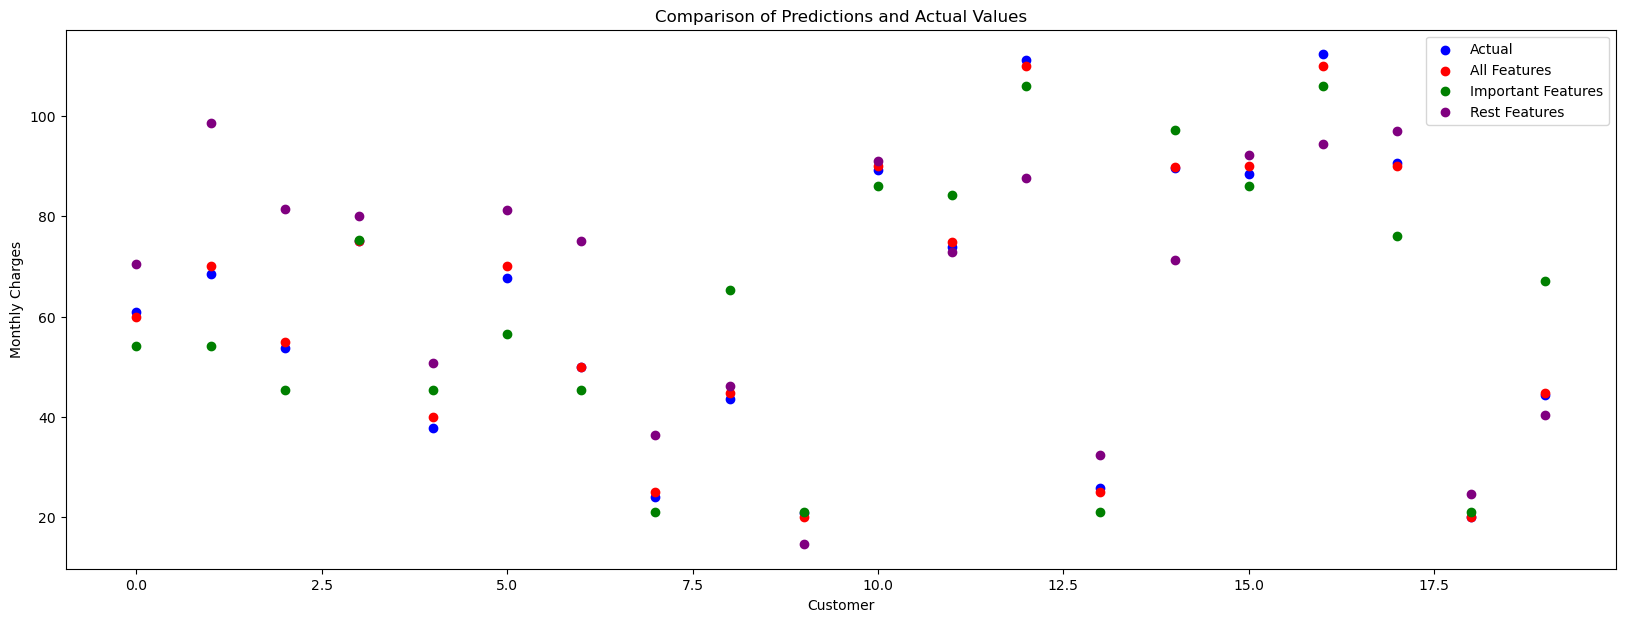

In [139]:
import matplotlib.pyplot as plt

# Assuming the four vectors are of the same length
n = len(Actual)

# Create a scatter plot for each model
plt.figure(figsize=(20, 7))

plt.scatter(range(n), Actual, color='blue', label='Actual')
plt.scatter(range(n), predicted_ALL_regression, color='red', label='All Features')
plt.scatter(range(n), predicted_IMPORTANT_regression, color='green', label='Important Features')
plt.scatter(range(n), predicted_THE_REST_regression, color='purple', label='Rest Features')

plt.xlabel('Customer')
plt.ylabel('Monthly Charges')
plt.title('Comparison of Predictions and Actual Values')
plt.legend()
plt.show()



In [140]:
from sklearn.metrics import mean_squared_error

# Calculate the mean squared error for each set of predictions
mse_ALL = mean_squared_error(Actual, predicted_ALL_regression)
mse_IMPORTANT = mean_squared_error(Actual, predicted_IMPORTANT_regression)
mse_THE_REST = mean_squared_error(Actual, predicted_THE_REST_regression)

# Print the mean squared errors
print("Mean Squared Error (All Features):", mse_ALL)
print("Mean Squared Error (Important Features):", mse_IMPORTANT)
print("Mean Squared Error (The Rest Features):", mse_THE_REST)


Mean Squared Error (All Features): 1.573937757492062
Mean Squared Error (Important Features): 100.36714406061171
Mean Squared Error (The Rest Features): 217.1776850585938
